In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Environment prep

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


## Load filtered dataset

In [ ]:
# One file for testing
FILE_NAME = '/content/drive/MyDrive/Wifi_Exercise_Dataset/tvat-filtered/tvat-JJ-2-filterd.csv-amp.csv'
df = pd.read_csv(FILE_NAME)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,66.408310,1.800000,0.0,0.0,0.0,0.0,26.210516,25.915438,25.296356,27.160076,...,10.824111,10.463630,9.792542,9.228686,10.009439,0.0,0.0,0.0,0.0,0.0
1,123.817460,5.800000,0.0,0.0,0.0,0.0,19.963750,21.868166,23.088781,26.042870,...,6.190388,5.100949,5.662303,3.070100,3.911489,0.0,0.0,0.0,0.0,0.0
2,144.186650,12.800000,0.0,0.0,0.0,0.0,20.417027,18.882074,21.473404,27.816917,...,9.416802,10.300999,11.172386,11.977613,11.739368,0.0,0.0,0.0,0.0,0.0
3,140.575600,20.685715,0.0,0.0,0.0,0.0,15.055485,18.176044,21.337635,20.528263,...,10.386272,12.979036,12.895396,15.196214,21.734314,0.0,0.0,0.0,0.0,0.0
4,122.630800,19.400000,0.0,0.0,0.0,0.0,15.039053,20.966913,24.327908,18.192510,...,16.481256,14.676727,18.873402,19.864014,23.888485,0.0,0.0,0.0,0.0,0.0
5,126.156820,8.885715,0.0,0.0,0.0,0.0,13.129835,18.568575,19.816560,15.689095,...,15.988288,10.819888,17.531467,16.485226,16.417010,0.0,0.0,0.0,0.0,0.0
6,126.286010,2.371428,0.0,0.0,0.0,0.0,15.287519,15.303101,14.873554,16.370680,...,15.111551,10.556846,16.114750,14.471857,12.593564,0.0,0.0,0.0,0.0,0.0
7,126.253716,4.000000,0.0,0.0,0.0,0.0,13.935519,14.690820,14.503833,13.825954,...,9.618671,12.781295,9.641891,11.023224,15.104717,0.0,0.0,0.0,0.0,0.0
8,126.253716,4.000000,0.0,0.0,0.0,0.0,16.821444,15.234264,17.403543,17.738958,...,9.081672,12.602845,8.925067,11.871430,13.909134,0.0,0.0,0.0,0.0,0.0
9,129.520450,4.171429,0.0,0.0,0.0,0.0,18.459496,16.058195,17.963058,19.301290,...,7.958058,10.064977,8.168356,10.194601,10.549718,0.0,0.0,0.0,0.0,0.0


## Labelling

In [ ]:
# JJ = 0, LA = 1, LL = 2, NA =3 , RA = 4, RL = 5, SO = 6
label = '0'

df['label'] = label

In [ ]:
df.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
8229,105.60303,4.0,0.0,0.0,0.0,0.0,14.138322,13.960390,16.954900,15.925890,...,12.503284,12.857997,12.318050,11.911642,0.0,0.0,0.0,0.0,0.0,0
8230,105.60303,4.0,0.0,0.0,0.0,0.0,15.465695,14.519158,16.055372,15.681448,...,11.857801,12.964174,13.002716,11.940648,0.0,0.0,0.0,0.0,0.0,0
8231,105.60303,4.0,0.0,0.0,0.0,0.0,15.434600,14.100124,14.664426,14.977783,...,10.470071,11.492061,12.327971,12.242750,0.0,0.0,0.0,0.0,0.0,0
8232,105.60303,4.0,0.0,0.0,0.0,0.0,14.988013,14.472038,15.359386,16.154490,...,10.980922,12.244633,11.725389,13.708062,0.0,0.0,0.0,0.0,0.0,0
8233,105.60303,4.0,0.0,0.0,0.0,0.0,14.230558,15.269781,16.042520,17.450447,...,11.781137,12.692720,12.323337,14.634718,0.0,0.0,0.0,0.0,0.0,0
8234,105.60303,4.0,0.0,0.0,0.0,0.0,13.135371,14.465673,16.049957,17.201237,...,12.891265,12.371996,12.243237,12.839946,0.0,0.0,0.0,0.0,0.0,0
8235,105.60303,4.0,0.0,0.0,0.0,0.0,12.065054,13.436667,14.952693,13.140983,...,11.322532,11.363542,11.357711,11.096291,0.0,0.0,0.0,0.0,0.0,0
8236,105.60303,4.0,0.0,0.0,0.0,0.0,12.078526,13.606742,15.122443,10.739508,...,11.088436,11.457302,10.584216,11.664145,0.0,0.0,0.0,0.0,0.0,0
8237,105.60303,4.0,0.0,0.0,0.0,0.0,13.418795,14.945725,15.303926,11.581840,...,11.390672,11.684215,11.488788,13.778014,0.0,0.0,0.0,0.0,0.0,0
8238,105.60303,4.0,0.0,0.0,0.0,0.0,13.940571,16.238089,15.809671,17.579187,...,12.256140,10.506812,12.350350,13.511069,0.0,0.0,0.0,0.0,0.0,0


## More dfs

In [ ]:
la_df = pd.read_csv('/content/drive/MyDrive/Wifi_Exercise_Dataset/tvat-filtered/tvat-LA-2-filterd.csv-amp.csv')
ll_df = pd.read_csv('/content/drive/MyDrive/Wifi_Exercise_Dataset/tvat-filtered/tvat-LL-2-filterd.csv-amp.csv')
ra_df = pd.read_csv('/content/drive/MyDrive/Wifi_Exercise_Dataset/tvat-filtered/tvat-RA-2-filterd.csv-amp.csv')
rl_df = pd.read_csv('/content/drive/MyDrive/Wifi_Exercise_Dataset/tvat-filtered/tvat-RL-2-filterd.csv-amp.csv')
na_df = pd.read_csv('/content/drive/MyDrive/Wifi_Exercise_Dataset/tvat-filtered/tvat-NA-2-filterd.csv-amp.csv')
so_df = pd.read_csv('/content/drive/MyDrive/Wifi_Exercise_Dataset/tvat-filtered/tvat-SO-2-filterd.csv-amp.csv')

In [ ]:
# JJ = 0, LA = 1, LL = 2, NA =3 , RA = 4, RL = 5, SO = 6

la_label = '1'
ll_label = '2'
na_label = '3'
ra_label = '4'
rl_label = '5'
so_label = '6'

la_df['label'] = la_label
ll_df['label'] = ll_label
na_df['label'] = na_label
ra_df['label'] = ra_label
rl_df['label'] = rl_label
so_df['label'] = so_label

In [ ]:
merged_df = pd.concat([df, la_df,ll_df,na_df,ra_df,rl_df,so_df], axis=0)
print(merged_df)


              0          1    2    3    4    5          6          7  \
0      66.40831   1.800000  0.0  0.0  0.0  0.0  26.210516  25.915438   
1     123.81746   5.800000  0.0  0.0  0.0  0.0  19.963750  21.868166   
2     144.18665  12.800000  0.0  0.0  0.0  0.0  20.417027  18.882074   
3     140.57560  20.685715  0.0  0.0  0.0  0.0  15.055485  18.176044   
4     122.63080  19.400000  0.0  0.0  0.0  0.0  15.039053  20.966913   
...         ...        ...  ...  ...  ...  ...        ...        ...   
6490  105.60303   4.000000  0.0  0.0  0.0  0.0  16.527815  14.600988   
6491  105.60303   4.000000  0.0  0.0  0.0  0.0  14.611956  15.305243   
6492  105.60303   4.000000  0.0  0.0  0.0  0.0   9.614627  10.444978   
6493  105.60303   4.000000  0.0  0.0  0.0  0.0   8.338937  10.176506   
6494  105.60303   4.000000  0.0  0.0  0.0  0.0  13.218794  13.642123   

              8          9  ...         55         56         57         58  \
0     25.296356  27.160076  ...  10.463630   9.792542   

# ITS TRAINING TIME

In [ ]:
from sklearn.model_selection import train_test_split

X = merged_df.iloc[:, :-1]
y = merged_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state = 42)

rf_classifier.fit(X_train,y_train)
rf_classifier.predict(X_test)


array(['0', '2', '1', ..., '3', '6', '3'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report
y_pred = rf_classifier.predict(X_test)
report = classification_report(y_pred,y_test,target_names=['JJ', 'LA', 'LL', 'NA', 'RA', 'RL', 'SO'])
print(report)

              precision    recall  f1-score   support

          JJ       0.66      0.64      0.65      1705
          LA       0.77      0.72      0.74      1180
          LL       0.88      0.88      0.88      1085
          NA       0.72      0.63      0.67      1911
          RA       0.52      0.58      0.55      1450
          RL       0.51      0.59      0.55       880
          SO       0.80      0.84      0.82      1263

    accuracy                           0.69      9474
   macro avg       0.69      0.70      0.69      9474
weighted avg       0.69      0.69      0.69      9474



## LOAD EVEN MORE DATA

In [ ]:
la3_df = pd.read_csv('/content/drive/MyDrive/Wifi_Exercise_Dataset/tvat-filtered/tvat-LA-3-filterd.csv-amp.csv')
ll3_df = pd.read_csv('/content/drive/MyDrive/Wifi_Exercise_Dataset/tvat-filtered/tvat-LL-3-filterd.csv-amp.csv')
ra3_df = pd.read_csv('/content/drive/MyDrive/Wifi_Exercise_Dataset/tvat-filtered/tvat-RA-3-filterd.csv-amp.csv')
rl3_df = pd.read_csv('/content/drive/MyDrive/Wifi_Exercise_Dataset/tvat-filtered/tvat-RL-3-filterd.csv-amp.csv')
na3_df = pd.read_csv('/content/drive/MyDrive/Wifi_Exercise_Dataset/tvat-filtered/tvat-NA-3-filterd.csv-amp.csv')
so3_df = pd.read_csv('/content/drive/MyDrive/Wifi_Exercise_Dataset/tvat-filtered/tvat-SO-3-filterd.csv-amp.csv')

In [ ]:
# JJ = 0, LA = 1, LL = 2, NA =3 , RA = 4, RL = 5, SO = 6


la3_df['label'] = la_label
ll3_df['label'] = ll_label
na3_df['label'] = na_label
ra3_df['label'] = ra_label
rl3_df['label'] = rl_label
so3_df['label'] = so_label

In [ ]:
merged_df_2_3 = pd.concat([merged_df, la3_df,ll3_df,na3_df,ra3_df,rl3_df,so3_df], axis=0)
print(merged_df_2_3)


              0          1    2    3    4    5          6          7  \
0      66.40831   1.800000  0.0  0.0  0.0  0.0  26.210516  25.915438   
1     123.81746   5.800000  0.0  0.0  0.0  0.0  19.963750  21.868166   
2     144.18665  12.800000  0.0  0.0  0.0  0.0  20.417027  18.882074   
3     140.57560  20.685715  0.0  0.0  0.0  0.0  15.055485  18.176044   
4     122.63080  19.400000  0.0  0.0  0.0  0.0  15.039053  20.966913   
...         ...        ...  ...  ...  ...  ...        ...        ...   
6717  105.60303   4.000000  0.0  0.0  0.0  0.0  16.877754  14.908454   
6718  105.60303   4.000000  0.0  0.0  0.0  0.0  15.765792  16.494198   
6719  105.60303   4.000000  0.0  0.0  0.0  0.0  15.930768  21.479061   
6720  105.60303   4.000000  0.0  0.0  0.0  0.0  18.259790  25.380037   
6721  105.60303   4.000000  0.0  0.0  0.0  0.0  12.941991  15.267063   

              8          9  ...         55         56         57         58  \
0     25.296356  27.160076  ...  10.463630   9.792542   

In [ ]:
newX = merged_df_2_3.iloc[:, :-1]
newy = merged_df_2_3.iloc[:, -1]

newX_train, newX_test, newy_train, newy_test = train_test_split(X, y, test_size=0.2, shuffle=True)


In [ ]:
rf_classifier.fit(newX_train,newy_train)

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=42)

In [ ]:
newy_pred = rf_classifier.predict(newX_test)
report = classification_report(newy_pred,newy_test,target_names=['JJ', 'LA', 'LL', 'NA', 'RA', 'RL', 'SO'])
print(report)


              precision    recall  f1-score   support

          JJ       0.68      0.64      0.66      1756
          LA       0.77      0.71      0.74      1198
          LL       0.88      0.88      0.88      1088
          NA       0.73      0.63      0.67      1852
          RA       0.54      0.60      0.57      1529
          RL       0.50      0.61      0.55       822
          SO       0.78      0.84      0.81      1229

    accuracy                           0.69      9474
   macro avg       0.70      0.70      0.70      9474
weighted avg       0.70      0.69      0.69      9474



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(newy_test, newy_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6922102596580114


In [ ]:
import pickle
pickle.dump(rf_classifier, open('/content/drive/MyDrive/Wifi_Exercise_Dataset/models/rf.pkl', 'wb')) #svm


## Test deep learning MLP

In [ ]:
import tensorflow as tf
def get_MLP_model(input_dim, learning_rate, num_classes):
    InputLayer = tf.keras.layers.InputLayer
    Dense = tf.keras.layers.Dense
    Flatten = tf.keras.layers.Flatten
    LSTM = tf.keras.layers.LSTM

    model = tf.keras.Sequential(
      [
          InputLayer(input_shape=input_dim),
          LSTM(1024),
          Dense(128, activation=tf.nn.relu),
          Dense(num_classes, activation=tf.nn.softmax)
      ])
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=learning_rate)

    model.compile(
        loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:

flat_data = np.array(newX_train)
flat_data = flat_data.reshape((flat_data.shape[0], 1, flat_data.shape[1]))
MLP_model = get_MLP_model(flat_data[0].shape, 0.001, 7)
MLP_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1024)              4460544   
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 7)                 903       
                                                                 
Total params: 4592647 (17.52 MB)
Trainable params: 4592647 (17.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Creating checkpoint callback for loading best weights
checkpoint_filepath = '/content/drive/MyDrive/Wifi_Exercise_Dataset/MLP_checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
label_in = np.array(newy_train)
label_in = label_in.astype(np.float64)


In [ ]:
MLP_model.fit(flat_data, label_in, batch_size=128, epochs=200, validation_split=0.2, shuffle=True, callbacks=[model_checkpoint_callback])

Epoch 1/200
237/237 [==============================] - 49s 193ms/step - loss: 1.0755 - accuracy: 0.6261 - val_loss: 0.9210 - val_accuracy: 0.6901
Epoch 2/200
237/237 [==============================] - 49s 208ms/step - loss: 0.9432 - accuracy: 0.6728 - val_loss: 0.8854 - val_accuracy: 0.6974
Epoch 3/200
237/237 [==============================] - 46s 193ms/step - loss: 0.9002 - accuracy: 0.6946 - val_loss: 0.8897 - val_accuracy: 0.6983
Epoch 4/200
237/237 [==============================] - 47s 197ms/step - loss: 0.8783 - accuracy: 0.7007 - val_loss: 0.8615 - val_accuracy: 0.7165
Epoch 5/200
237/237 [==============================] - 48s 203ms/step - loss: 0.8846 - accuracy: 0.6976 - val_loss: 0.9025 - val_accuracy: 0.6714
Epoch 6/200
237/237 [==============================] - 45s 189ms/step - loss: 0.8688 - accuracy: 0.7018 - val_loss: 0.8628 - val_accuracy: 0.7036
Epoch 7/200
237/237 [==============================] - 48s 201ms/step - loss: 0.8580 - accuracy: 0.7050 - val_loss: 0.8345 -

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_data = np.array(newX_test)
test_data = test_data.reshape((test_data.shape[0], 1, test_data.shape[1]))

test_label = np.array(newy_test)
test_label = test_label.astype(np.float64)



9474/9474 - 44s - 44s/epoch - 5ms/step
Confusion matrix, without normalization
[[1154   88    9   29  149  169   56]
 [  35  898   15    6  116    9   44]
 [  12   31  997   14   25   14   30]
 [  36   11    8 1268  195   77   30]
 [  71   94   10  193 1195   75   31]
 [ 104   10   10   88  112  622   22]
 [  28   90   29    9   53   29 1074]]
Per class:  [0.69770254 0.79964381 0.88780053 0.78030769 0.7159976  0.64256198
 0.81859756]


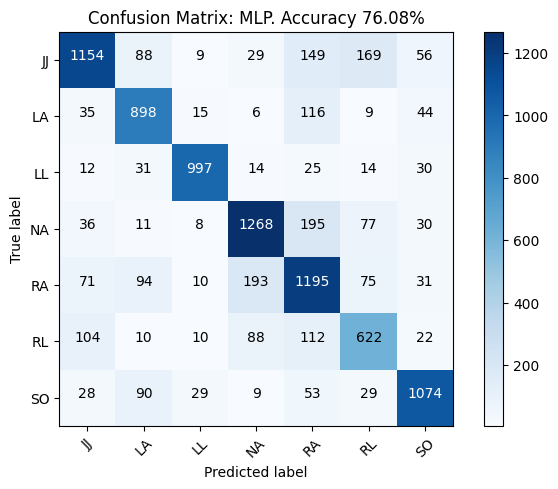

In [ ]:
predictions = MLP_model.predict(
      x=test_data
    , batch_size=1
    , verbose=2
)

# Rounding predictions values to map into confusion matrix
rounded_predictions = np.argmax(predictions, axis=-1)

cm_plot_labels = ['JJ', 'LA', 'LL', 'NA', 'RA', 'RL', 'SO']
cm = confusion_matrix(y_true=test_label, y_pred=rounded_predictions)
accuracy = accuracy_score(test_label, rounded_predictions) * 100
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title=f'Confusion Matrix: MLP. Accuracy {accuracy:.02f}%')
print("Per class: ", cm.diagonal()/cm.sum(axis=1))

## Save model

In [ ]:

MLP_model.save('/content/drive/MyDrive/Wifi_Exercise_Dataset/models/mlp_model.h5')
